<a href="https://colab.research.google.com/github/ktongk/Datasci/blob/main/dataSciFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**README**


League of Legends is a 5v5 game where each player choses a role. The aim is to destroy the opposing teams nexus. They do so by collecting gold/xp to get better ingame stats. Ways to collect gold are
*   Killing monster objectives
*   Killing opposing players
*   Killing minions
*   Destroying towers

For this project, I am to predict game outcomes based on ingame stats throughout the games. I plan to test my prediction using data from

**Early Game:**
*   First objective goals (dragon, herald, kill)
*   Gold diff at 10 minutes
*   Xp diff at 10 minutes

etc

**Mid Game**
*   First objective goals (baron, tower, 3 towers)
*   Gold diff at 15 min
*   Xp diff at 15 min

etc

**Late Game**
*   Total kills
*   Inhibitors
*   Gold diff at 25 minutes
*   Xp diff at 25 minutes

etc









**I have submitted the two csv files I used for this project alongside the code. Place the csv into your google drive and then change the path below to your proper path within your own drive. If not I have linked the github which contains an already ran representation of this code.**

# Necessaries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV


from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve, auc, mean_squared_error, mean_absolute_error, r2_score


from sklearn.ensemble import RandomForestClassifier

In [2]:
from google.colab import drive

drive.mount('/content/drive/')
path_2016 = r'/content/drive/MyDrive/DataScience/2016_LoL_esports_match_data_from_OraclesElixir.csv'
path_2021 = r'/content/drive/MyDrive/DataScience/2021_LoL_esports_match_data_from_OraclesElixir.csv'

df_2016 = pd.read_csv(path_2016)
df_2021 = pd.read_csv(path_2021)

Mounted at /content/drive/


# Preprocessing

Add 'teamname' if we are training xgboost because we can label encode

In [3]:
# removed  'firstbaron', 'firsttower' bc typically not in first 10 min
early_game_team = [
    'side', 'result', 'firstblood', 'firstdragon', 'firstherald',
    'goldat10', 'xpat10', 'csat10', 'opp_goldat10', 'opp_xpat10', 'opp_csat10', 'golddiffat10',
    'xpdiffat10', 'csdiffat10', 'killsat10', 'assistsat10', 'deathsat10', 'opp_killsat10', 'opp_assistsat10',
    'opp_deathsat10'
]
mid_game_team = [
    'side', 'result', 'firstblood', 'firstdragon', 'firstherald', 'firstbaron', 'firsttower',
    'firstmidtower', 'firsttothreetowers',
    'goldat10', 'xpat10', 'csat10', 'opp_goldat10', 'opp_xpat10', 'opp_csat10', 'golddiffat10', 'xpdiffat10',
    'csdiffat10', 'killsat10', 'assistsat10', 'deathsat10', 'opp_killsat10', 'opp_assistsat10', 'opp_deathsat10',
    'goldat15', 'xpat15', 'csat15', 'opp_goldat15', 'opp_xpat15', 'opp_csat15', 'golddiffat15', 'xpdiffat15',
    'csdiffat15', 'killsat15', 'assistsat15', 'deathsat15', 'opp_killsat15', 'opp_assistsat15', 'opp_deathsat15']

end_game_team = [
    'side', 'result', 'teamkills', 'teamdeaths',  'dragons', 'opp_dragons', 'infernals', 'mountains', 'clouds', 'oceans', 'elders',
    'opp_elders', 'heralds', 'opp_heralds', 'barons', 'opp_barons', 'towers', 'opp_towers', 'inhibitors', 'opp_inhibitors', 'gamelength',
    'goldat20', 'xpat20', 'csat20', 'opp_goldat20', 'opp_xpat20', 'opp_csat20', 'golddiffat20', 'xpdiffat20',
    'csdiffat20', 'killsat20', 'assistsat20', 'deathsat20', 'opp_killsat20', 'opp_assistsat20', 'opp_deathsat20',
    'goldat25', 'xpat25', 'csat25', 'opp_goldat25', 'opp_xpat25', 'opp_csat25', 'golddiffat25',  'xpdiffat25',
    'csdiffat25', 'killsat25', 'assistsat25', 'deathsat25', 'opp_killsat25', 'opp_assistsat25', 'opp_deathsat25'
]

team_col = [
    'gameid', 'game', 'teamid', 'side', 'teamname', 'gamelength', 'result', 'teamkills', 'teamdeaths',
    'doublekills', 'triplekills', 'quadrakills', 'pentakills', 'firstblood', 'team kpm', 'ckpm',
    'firstdragon', 'dragons', 'opp_dragons', 'infernals', 'mountains', 'clouds', 'oceans', 'elders',
    'opp_elders', 'firstherald', 'heralds', 'opp_heralds', 'firstbaron', 'barons', 'opp_barons',
    'firsttower', 'towers', 'opp_towers', 'firstmidtower', 'firsttothreetowers', 'inhibitors',
    'opp_inhibitors', 'damagetochampions','dpm', 'damagetakenperminute', 'wardsplaced', 'wpm',
    'wardskilled', 'wcpm', 'controlwardsbought', 'totalgold', 'earnedgold', 'earned gpm', 'goldspent',
    'gspd', 'gpr', 'minionkills', 'monsterkills', 'monsterkillsenemyjungle', 'cspm',
    'goldat10', 'xpat10', 'csat10', 'opp_goldat10', 'opp_xpat10', 'opp_csat10', 'golddiffat10',
    'xpdiffat10', 'csdiffat10', 'killsat10', 'assistsat10', 'deathsat10', 'opp_killsat10', 'opp_assistsat10', 'opp_deathsat10',
    'goldat15', 'xpat15', 'csat15', 'opp_goldat15', 'opp_xpat15', 'opp_csat15', 'golddiffat15',
    'xpdiffat15', 'csdiffat15', 'killsat15', 'assistsat15', 'deathsat15', 'opp_killsat15', 'opp_assistsat15', 'opp_deathsat15',
    'goldat20', 'xpat20', 'csat20', 'opp_goldat20', 'opp_xpat20', 'opp_csat20', 'golddiffat20',
    'xpdiffat20', 'csdiffat20', 'killsat20', 'assistsat20', 'deathsat20', 'opp_killsat20', 'opp_assistsat20', 'opp_deathsat20',
    'goldat25', 'xpat25', 'csat25', 'opp_goldat25', 'opp_xpat25', 'opp_csat25', 'golddiffat25',
    'xpdiffat25', 'csdiffat25', 'killsat25', 'assistsat25', 'deathsat25', 'opp_killsat25', 'opp_assistsat25', 'opp_deathsat25'
    ]


In [4]:
def map_team(id):
  if id in range(1,6):
    return 100
  elif id in range(6,11):
    return 200
  else:
    return id

In [5]:
'''
Label encoding for categorical data for xgboost, randomforests etc
'''
def label_encode_dataframe(df):
    le = LabelEncoder()
    df_encoded = df.copy()

    for col in df_encoded.columns:
        if df_encoded[col].dtype == 'object' or df_encoded[col].dtype.name == 'category':
            df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

    return df_encoded

In [6]:
'''
Filling missing values in my data
Good for linear models like logistic regression because replace categorical data
with the mode and numerical data with the mean
'''
def fill_na(df):
  empty_col = df.columns[df.isna().any()]
  for col in empty_col:
      if df[col].dtype == 'object':
          df.loc[:,col] = df[col].fillna(df[col].mode()[0])  # For categorical columns
      else:
          df.loc[:, col] = df[col].fillna(df[col].mean())  # For numeric columns
  return df

'''
Filling missing data values in my data
'''
def fill_na_xgb(df):
  df = label_encode_dataframe(df)

  empty_col = df.columns[df.isna().any()]
  for col in empty_col:
        df.loc[:, col] = df[col].fillna(df[col].mean())
  return df

In [7]:
def xgb_preprocess_df(df, game_info, map_team):
    # Step 1: Drop incomplete data columns
    df = df[df['datacompleteness'].str.contains('complete', case=False, na=False)].copy()

    # Step 2: Encode side
    df['side'] = df['side'].map({'Blue': 1, 'Red': 0})

    # Step 3: Map teamid to participantid
    df['teamid'] = df['participantid'].apply(map_team)

    # Step 4: Create game-specific DataFrame
    team_stats = df[df['participantid'].isin([100, 200])]
    game_df = team_stats[game_info].copy()

    # Step 5: Fill missing values
    game_df = fill_na(game_df)

    return game_df


In [8]:
def logistic_preprocess_df(df, game_info, map_team):
    # Step 1: Drop incomplete data columns
    df = df[df['datacompleteness'].str.contains('complete', case=False, na=False)].copy()

    # Step 2: Encode side
    df['side'] = df['side'].map({'Blue': 1, 'Red': 0})

    # Step 3: Map teamid to participantid
    df['teamid'] = df['participantid'].apply(map_team)

    # Step 4: Create game-specific DataFrame
    team_stats = df[df['participantid'].isin([100, 200])]
    game_df = team_stats[game_info].copy()

    # Step 5: Fill missing values
    game_df = fill_na(game_df)

    return game_df

2016 Team stats

In [9]:
team_stats = logistic_preprocess_df(df_2016, team_col, map_team)

In [10]:
log_early_2021 = logistic_preprocess_df(df_2021, early_game_team, map_team)
log_mid_2021 = logistic_preprocess_df(df_2021, mid_game_team, map_team)
log_end_2021 = logistic_preprocess_df(df_2021, end_game_team, map_team)

xgb_early_2021 = xgb_preprocess_df(df_2021, early_game_team, map_team)
xgb_mid_2021 = xgb_preprocess_df(df_2021, mid_game_team, map_team)
xgb_end_2021 = xgb_preprocess_df(df_2021, end_game_team, map_team)

log_early_2016 = logistic_preprocess_df(df_2016, early_game_team, map_team)
log_mid_2016 = logistic_preprocess_df(df_2016, mid_game_team, map_team)
log_end_2016 = logistic_preprocess_df(df_2016, end_game_team, map_team)

xgb_early_2016 = xgb_preprocess_df(df_2016, early_game_team, map_team)
xgb_mid_2016 = xgb_preprocess_df(df_2016, mid_game_team, map_team)
xgb_end_2016 = xgb_preprocess_df(df_2016, end_game_team, map_team)

# Exploratory Data Anlysis

Game length is skewed

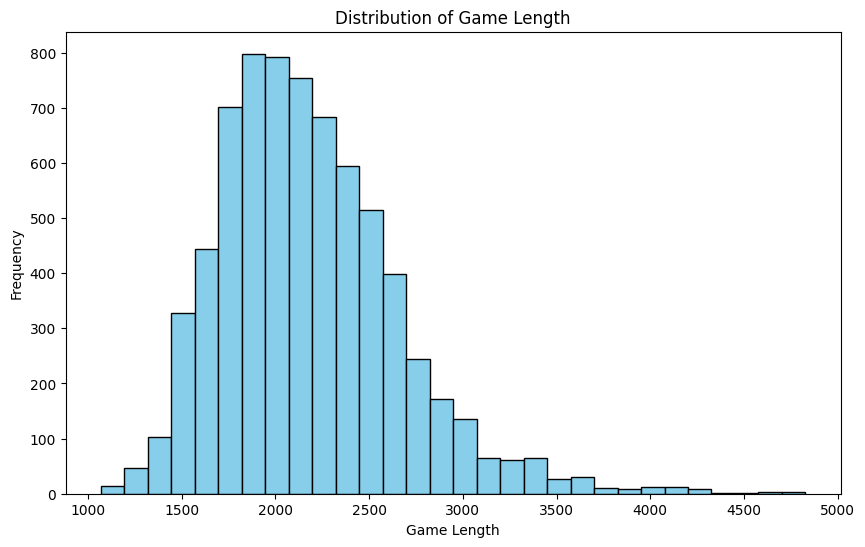

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(team_stats['gamelength'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Game Length')
plt.xlabel('Game Length')
plt.ylabel('Frequency')
plt.show()

While looking at correlations, I've decided to scale the data for better correlations. Despite this, we cna see gamelength has almost no relevancy for correlation excpet inhibitors. This makes snese, the more inhibitors taken, we assume the longer the game is.

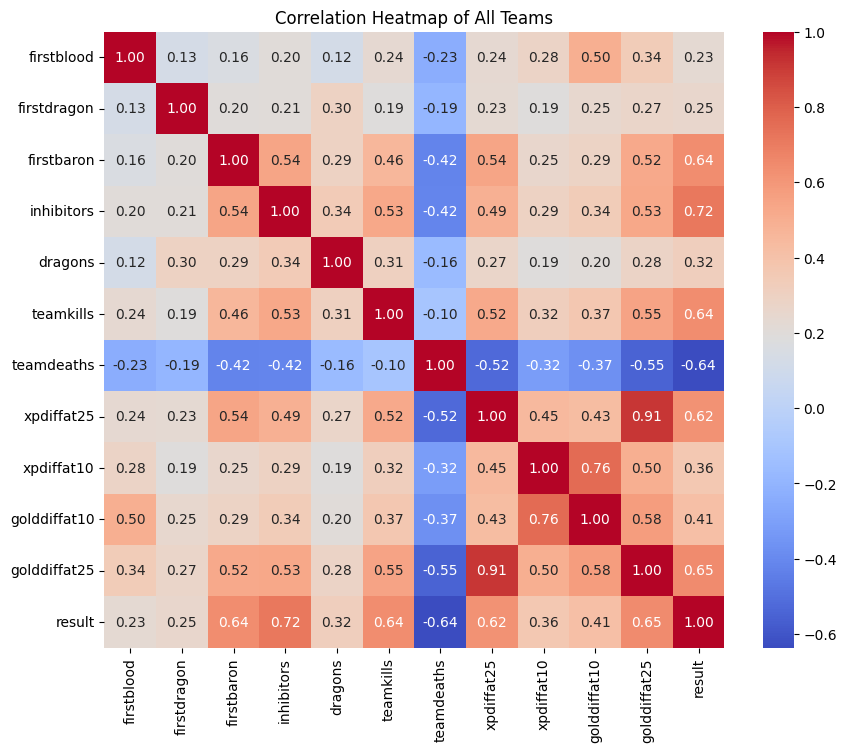

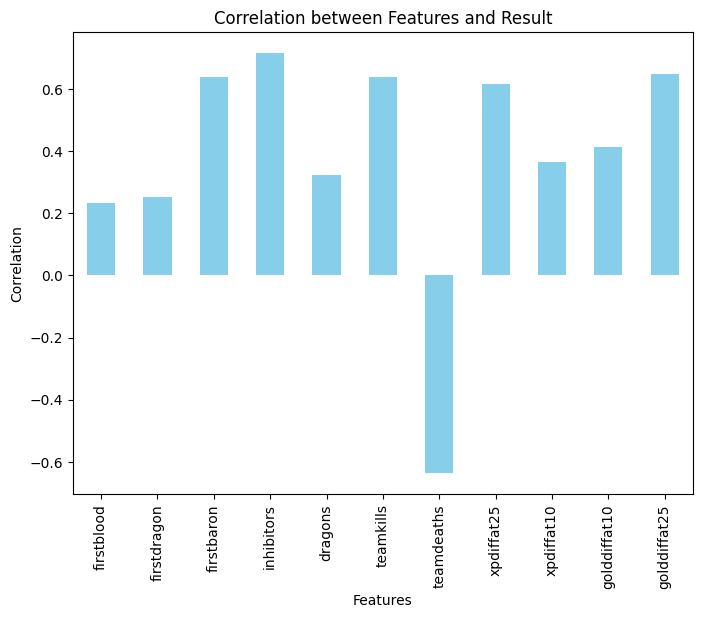

In [12]:
select_col = ['firstblood', 'firstdragon', 'firstbaron', 'inhibitors', 'dragons',
              'teamkills', 'teamdeaths', 'xpdiffat25', 'xpdiffat10','golddiffat10',
              'golddiffat25', 'result']

corr_matrix = team_stats[select_col].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of All Teams')
plt.show()

correlation_with_result = corr_matrix['result']

plt.figure(figsize=(8, 6))
correlation_with_result.drop('result').plot(kind='bar', color='skyblue')  # Drop the result column from the bar plot
plt.title('Correlation between Features and Result')
plt.ylabel('Correlation')
plt.xlabel('Features')
plt.show()


Looking at First claims and their winrates

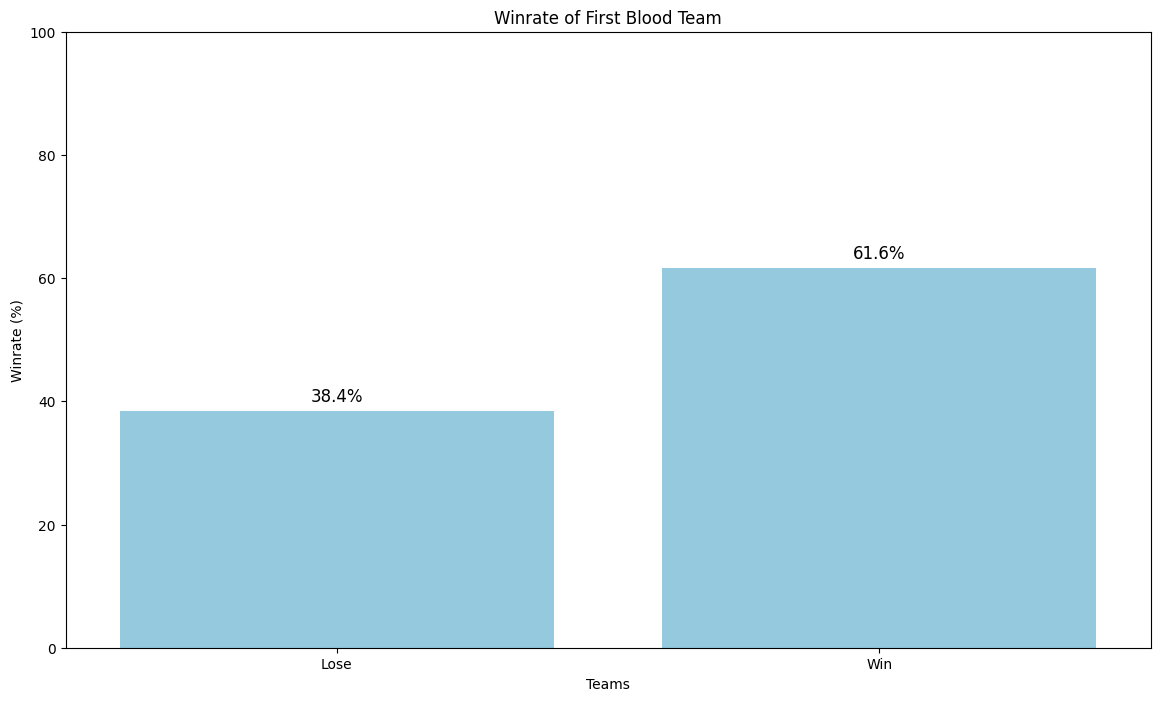

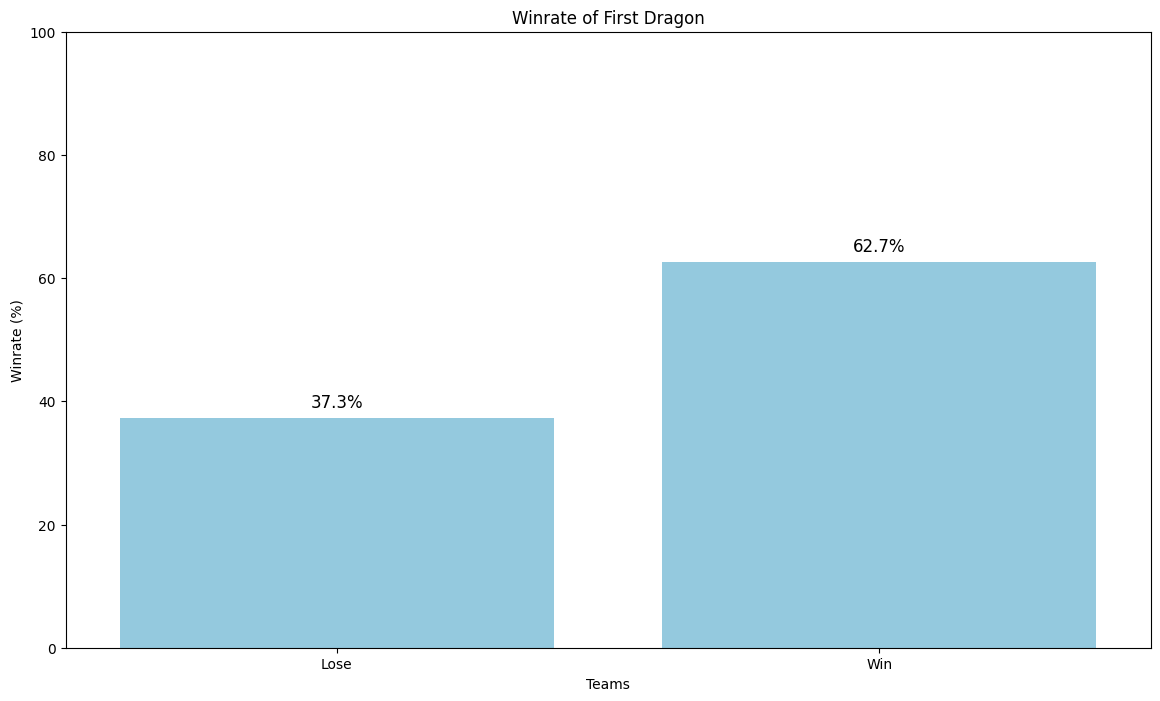

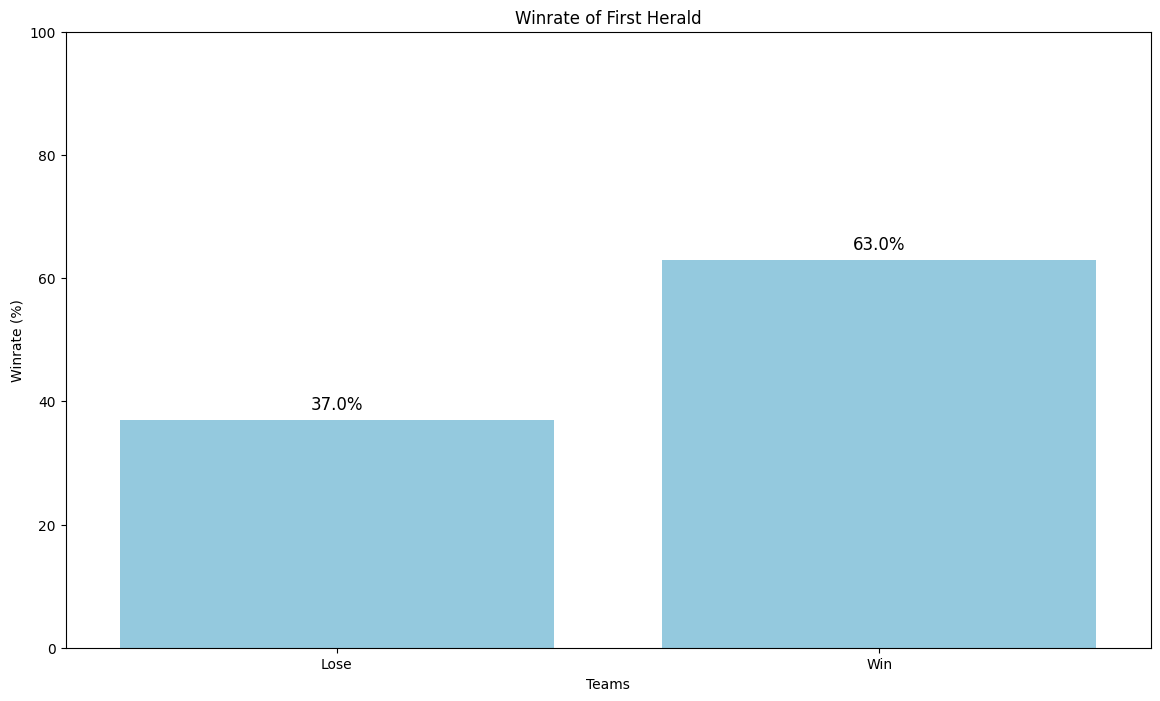

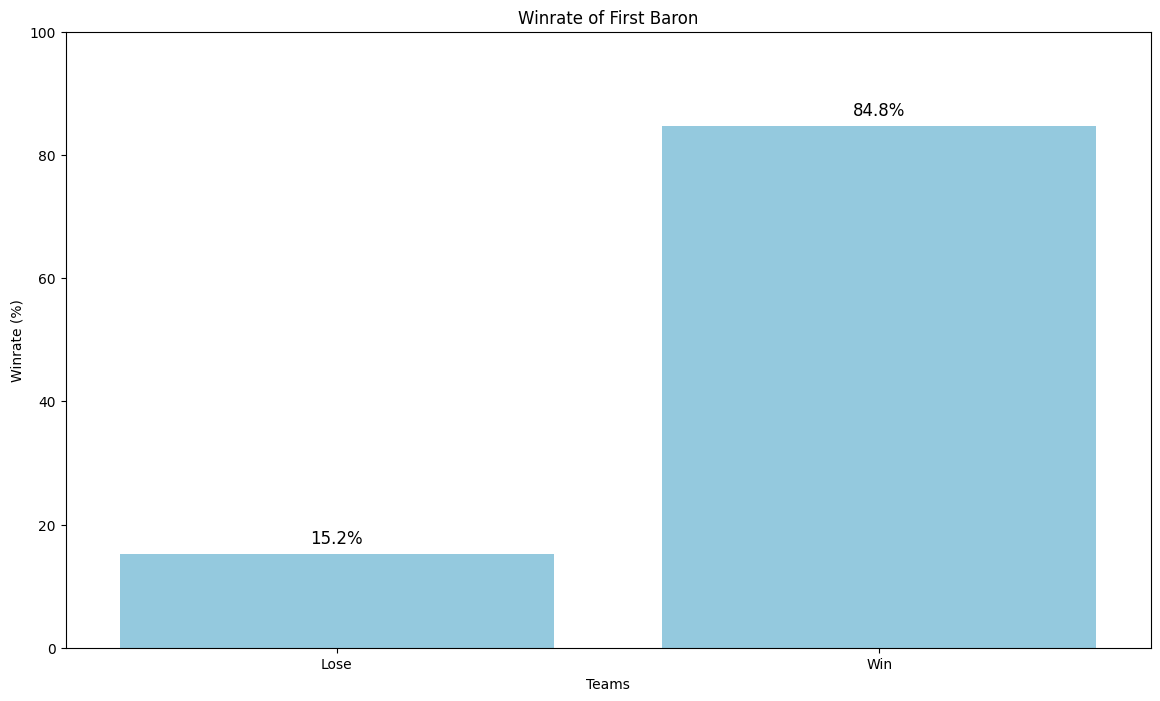

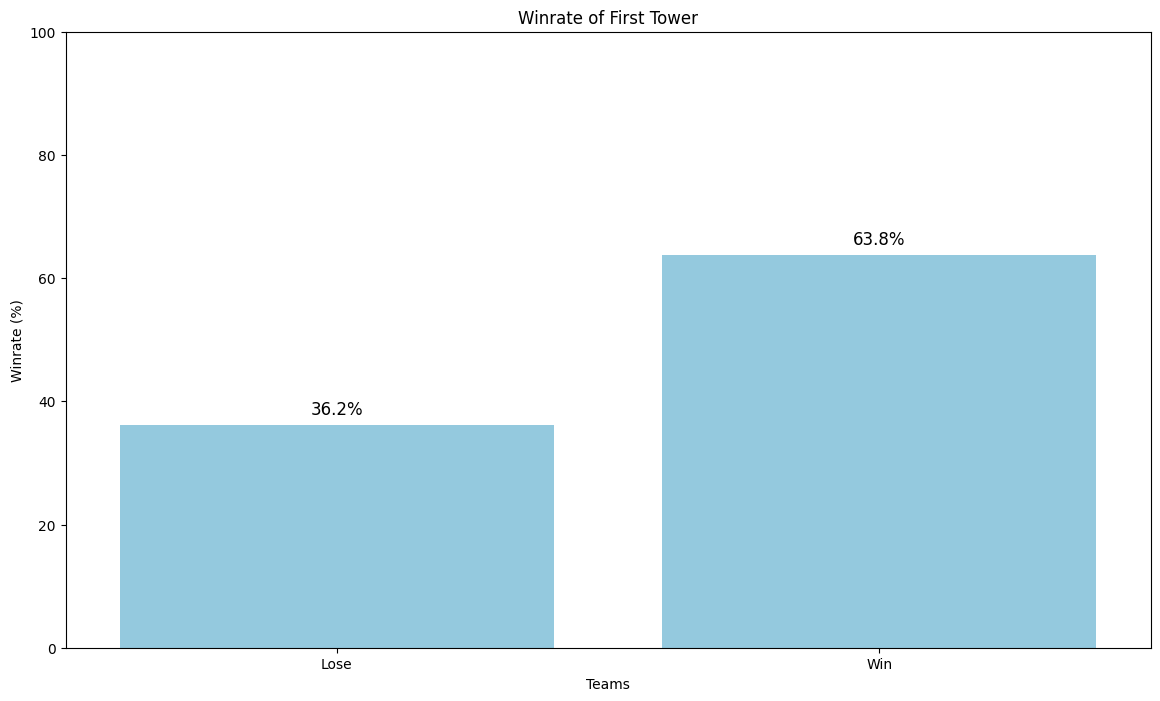

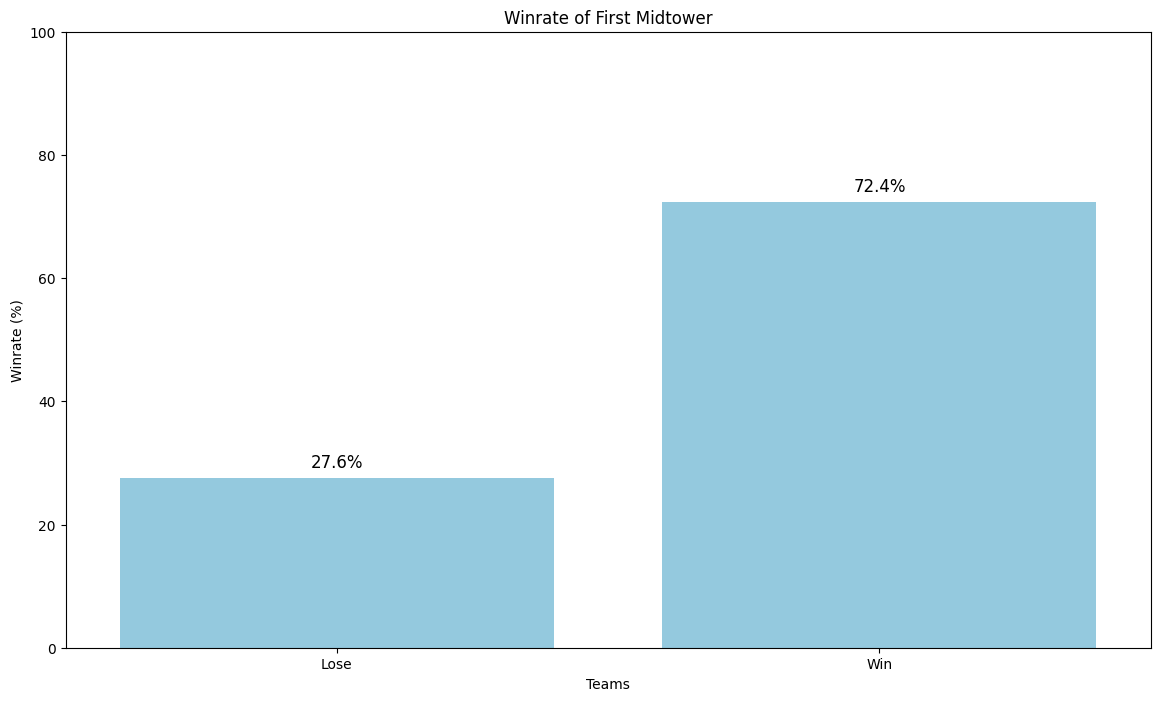

In [13]:
first_blood_teams = team_stats[team_stats['firstblood'] == 1]
first_dragon_teams = team_stats[team_stats['firstdragon'] == 1]
first_herald_teams = team_stats[team_stats['firstherald'] == 1]
first_baron_teams = team_stats[team_stats['firstbaron'] == 1]
first_tower_teams = team_stats[team_stats['firsttower'] == 1]
first_midtower_teams = team_stats[team_stats['firstmidtower'] == 1]
first_to_three_teams = team_stats[team_stats['firsttothreetowers'] == 1]

win_rate_blood = first_blood_teams['result'].value_counts(normalize=True).mul(100)
win_rate_dragon = first_dragon_teams['result'].value_counts(normalize=True).mul(100)
win_rate_herald = first_herald_teams['result'].value_counts(normalize=True).mul(100)
win_rate_baron = first_baron_teams['result'].value_counts(normalize=True).mul(100)
win_rate_tower = first_tower_teams['result'].value_counts(normalize=True).mul(100)
win_rate_midtower = first_midtower_teams['result'].value_counts(normalize=True).mul(100)
win_rate_to_three = first_to_three_teams['result'].value_counts(normalize=True).mul(100)

plt.figure(figsize=(14, 8))

ax = sns.barplot(x=win_rate_blood.index, y=win_rate_blood.values, color='skyblue')
plt.title('Winrate of First Blood Team')
plt.xlabel('Teams')
plt.ylabel('Winrate (%)')
plt.xticks([0, 1], ['Lose', 'Win'])
plt.ylim(0, 100)
for p in ax.patches:
    percentage = str(round(p.get_height(), 1)) + '%'
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 1, percentage,
            ha='center', va='bottom', fontsize=12, color='black')
plt.show()

plt.figure(figsize=(14,8))

ax = sns.barplot(x=win_rate_dragon.index, y=win_rate_dragon.values, color='skyblue')
plt.title('Winrate of First Dragon')
plt.xlabel('Teams')
plt.ylabel('Winrate (%)')
plt.xticks([0, 1], ['Lose', 'Win'])
plt.ylim(0, 100)
for p in ax.patches:
    percentage = str(round(p.get_height(), 1)) + '%'
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 1, percentage,
            ha='center', va='bottom', fontsize=12, color='black')
plt.show()

plt.figure(figsize=(14,8))

ax = sns.barplot(x=win_rate_herald.index, y=win_rate_herald.values, color='skyblue')
plt.title('Winrate of First Herald')
plt.xlabel('Teams')
plt.ylabel('Winrate (%)')
plt.xticks([0, 1], ['Lose', 'Win'])
plt.ylim(0, 100)
for p in ax.patches:
    percentage = str(round(p.get_height(), 1)) + '%'
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 1, percentage,
            ha='center', va='bottom', fontsize=12, color='black')
plt.show()

plt.figure(figsize=(14,8))

ax = sns.barplot(x=win_rate_baron.index, y=win_rate_baron.values, color='skyblue')
plt.title('Winrate of First Baron')
plt.xlabel('Teams')
plt.ylabel('Winrate (%)')
plt.xticks([0, 1], ['Lose', 'Win'])
plt.ylim(0, 100)
for p in ax.patches:
    percentage = str(round(p.get_height(), 1)) + '%'
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 1, percentage,
            ha='center', va='bottom', fontsize=12, color='black')
plt.show()

plt.figure(figsize=(14,8))

ax = sns.barplot(x=win_rate_tower.index, y=win_rate_tower.values, color='skyblue')
plt.title('Winrate of First Tower')
plt.xlabel('Teams')
plt.ylabel('Winrate (%)')
plt.xticks([0, 1], ['Lose', 'Win'])
plt.ylim(0, 100)
for p in ax.patches:
    percentage = str(round(p.get_height(), 1)) + '%'
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 1, percentage,
            ha='center', va='bottom', fontsize=12, color='black')
plt.show()

plt.figure(figsize=(14,8))

ax = sns.barplot(x=win_rate_midtower.index, y=win_rate_midtower.values, color='skyblue')
plt.title('Winrate of First Midtower')
plt.xlabel('Teams')
plt.ylabel('Winrate (%)')
plt.xticks([0, 1], ['Lose', 'Win'])
plt.ylim(0, 100)
for p in ax.patches:
    percentage = str(round(p.get_height(), 1)) + '%'
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 1, percentage,
            ha='center', va='bottom', fontsize=12, color='black')
plt.show()

# Models

In [14]:
def calculate_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE': mean_absolute_error(y_true, y_pred),
        'AUC': roc_auc_score(y_true, y_pred)
    }


In [15]:
def logistic_regression(df, iter, C, penalty):
  X = df.drop('result', axis=1)
  y = df['result']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  model = LogisticRegression(max_iter=iter, C=C, penalty=penalty)
  model.fit(X_train_scaled, y_train)

  y_pred = model.predict(X_test_scaled)

  metrics = calculate_metrics(y_test, y_pred)

  return [model, metrics] # add scaler as a return if needed

In [16]:
def random_forest(df, n_estimators, max_depth):
  X = df.drop('result', axis=1)
  y = df['result']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  random_forest = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
  random_forest.fit(X_train, y_train)

  feature_importance = random_forest.feature_importances_

  # Create a DataFrame to display the importance of each feature
  importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
  importance_df = importance_df.sort_values(by='Importance', ascending=False)

  # print(importance_df)

  y_pred = random_forest.predict(X_test)

  metrics = calculate_metrics(y_test, y_pred)

  return [random_forest, metrics]

In [17]:
def xgboost(df, n_estimators, max_depth, learning_rate):
  X = df.drop('result', axis=1)
  y = df['result']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = xgb.XGBClassifier(
    objective='binary:logistic',  # because it's binary classification (e.g., win/lose)
    eval_metric='logloss',        # logistic loss for binary classification
    n_estimators=n_estimators,    # number of trees
    max_depth=max_depth,          # maximum tree depth
    learning_rate=learning_rate,  # how much each tree corrects the last one
    subsample=0.8,                # use 80% of data per tree
    colsample_bytree=0.8,         # use 80% features per tree
    random_state=42
  )

  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  metrics = calculate_metrics(y_test, y_pred)

  xgb.plot_importance(model, max_num_features=15)
  plt.title('XGBoost Feature Importance')
  plt.show()

  return model, metrics

def optimized_xgboost(df):
  X = df.drop('result', axis=1)
  y = df['result']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = xgb.XGBClassifier(
      objective='binary:logistic',
      eval_metric='logloss',
      subsample=0.8,
      colsample_bytree=0.8,
      random_state=42
  )
  param_grid = {
      'n_estimators': [100, 200, 300],
      'max_depth': [4, 6, 8],
      'learning_rate': [0.01, 0.1, 0.2],
      'gamma': [0, 1, 5],
      'min_child_weight': [1, 3, 5]
   }

  grid_search = GridSearchCV(
      model,
      param_grid=param_grid,
      scoring='accuracy',
      cv=3,           # 3-fold cross-validation
      verbose=1,
      n_jobs=-1
  )

  grid_search.fit(X_train, y_train)

  best_model = grid_search.best_estimator_

  y_pred = best_model.predict(X_test)
  metrics = calculate_metrics(y_test, y_pred)

  print("Best hyperparameters found:", grid_search.best_params_)

  xgb.plot_importance(best_model, max_num_features=15)
  plt.title('XGBoost Feature Importance (Optimized with GridSearch)')
  plt.show()

  return [best_model, metrics]


# Model Testing

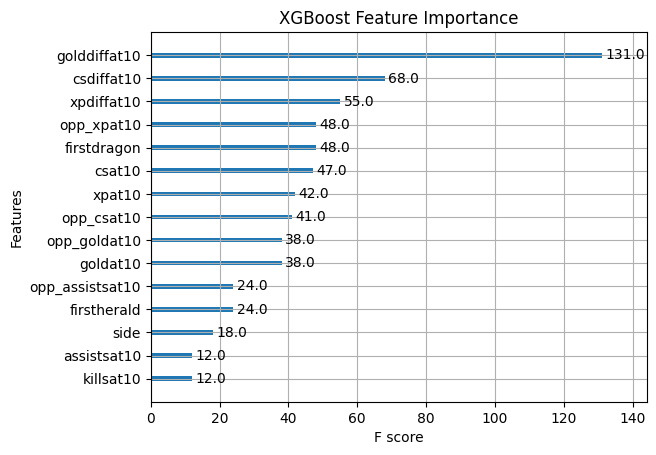

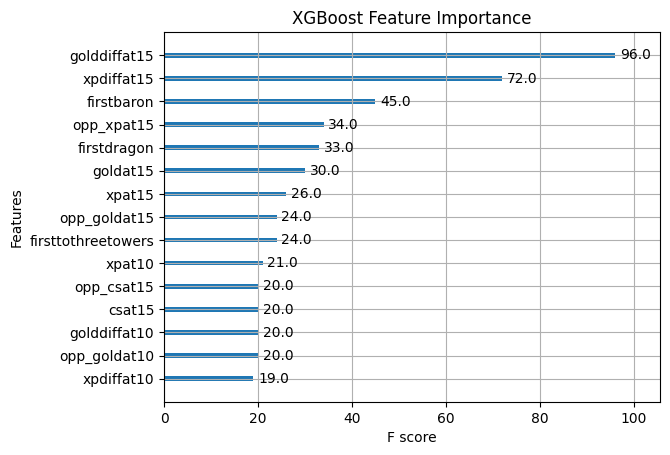

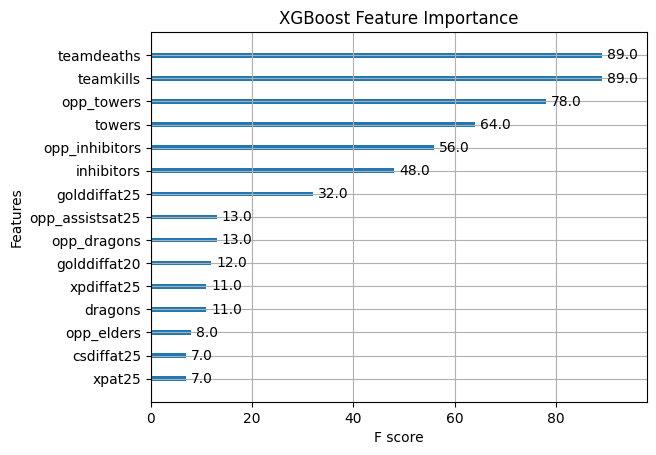

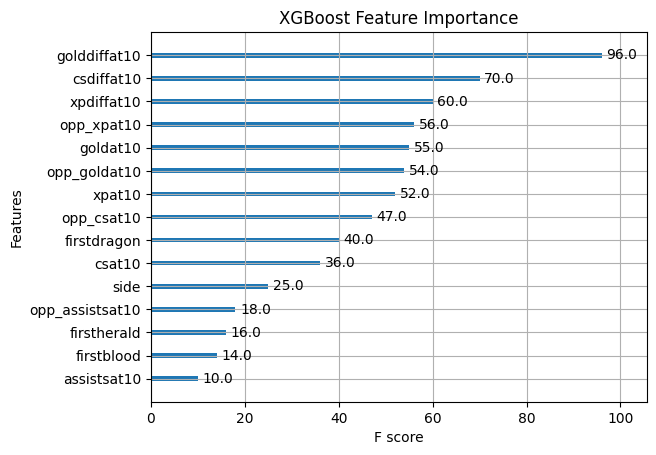

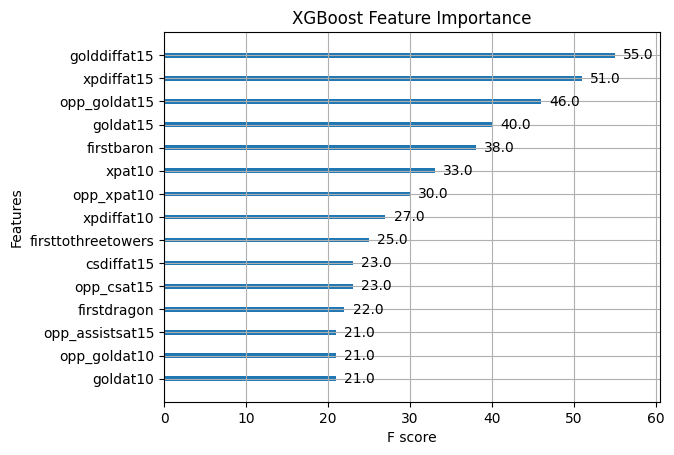

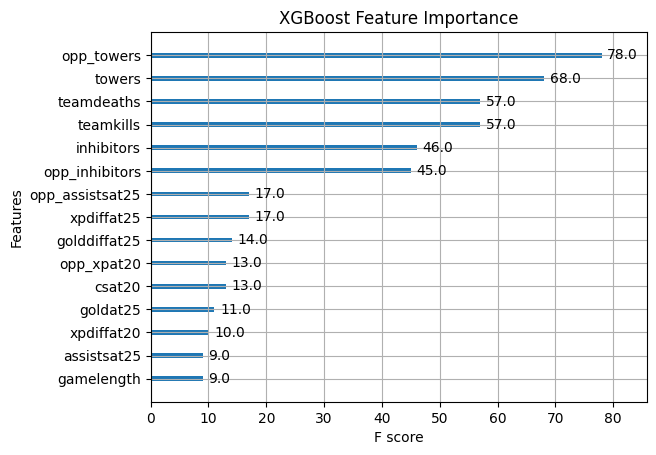

In [18]:
models = {
    '2021': {
        'Early Game': {
            'Logistic Regression': logistic_regression(log_early_2021, 1000, 1, 'l2'),
            'Random Forest': random_forest(xgb_early_2021, 100, 10),
            'XGBoost': xgboost(xgb_early_2021, 100, 3, 0.1)
            # 'Optimized XGBoost': optimized_xgboost(xgb_early_2021)
        },
        'Mid Game': {
            'Logistic Regression': logistic_regression(log_mid_2021, 1000, 1, 'l2'),
            'Random Forest': random_forest(xgb_mid_2021, 100, 10),
            'XGBoost': xgboost(xgb_mid_2021, 100, 3, 0.1)
            #'Optimized XGBoost': optimized_xgboost(xgb_mid_2021)
        },
        'Late Game': {
            'Logistic Regression': logistic_regression(log_end_2021, 1000, 1, 'l2'),
            'Random Forest': random_forest(xgb_end_2021, 100, 10),
            'XGBoost': xgboost(xgb_end_2021, 100, 3, 0.1)
            #'Optimized XGBoost': optimized_xgboost(xgb_end_2021)
        }
    },
    '2016': {
        'Early Game': {
            'Logistic Regression': logistic_regression(log_early_2016, 1000, 1, 'l2'),
            'Random Forest': random_forest(xgb_early_2016, 100, 10),
            'XGBoost': xgboost(xgb_early_2016, 100, 3, 0.1)
            #'Optimized XGBoost': optimized_xgboost(xgb_early_2016)
        },
        'Mid Game': {
            'Logistic Regression': logistic_regression(log_mid_2016, 1000, 1, 'l2'),
            'Random Forest': random_forest(xgb_mid_2016, 100, 10),
            'XGBoost': xgboost(xgb_mid_2016, 100, 3, 0.1)
            #'Optimized XGBoost': optimized_xgboost(xgb_mid_2016)
        },
        'Late Game': {
            'Logistic Regression': logistic_regression(log_end_2016, 1000, 1, 'l2'),
            'Random Forest': random_forest(xgb_end_2016, 100, 10),
            'XGBoost': xgboost(xgb_end_2016, 100, 3, 0.1)
            #'Optimized XGBoost': optimized_xgboost(xgb_end_2016)
        }
    }
}


# Model Performance

In [19]:
'''
dictionary dict
year string
state string (capital letter)
'''
def plot_metrics(dictionary, year, state):
  metrics_to_plot = ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'MSE', 'RMSE', 'MAE', 'AUC']
  model_names = ['Logistic Regression', 'Random Forest', 'XGBoost'] # removed 'Optimized XGBoost' because it takes too long to train

  data = {metric: [] for metric in metrics_to_plot}

  for model_name, model_info in dictionary.items():
      metrics = model_info[1]
      for metric in metrics_to_plot:
          data[metric].append(metrics[metric])


  df = pd.DataFrame(data, index=model_names)

  plt.figure(figsize=(14, 8))

  for i, metric in enumerate(metrics_to_plot):
      ax = sns.barplot(x=model_names, y=df[metric], color='skyblue')
      plt.title(f'{year} - {state} Game: {metric} Comparison')
      plt.ylabel(f'{metric} Score')
      plt.xlabel('Models')

      for p in ax.patches:
          ax.annotate(f'{p.get_height():.2f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      xytext=(0, 5),  # 5 points vertical offset
                      textcoords='offset points',
                      ha='center', va='center')

      plt.xticks(rotation=45)
      plt.ylim(0, 1)
      plt.show()



In [20]:
def plot_comparisons(df, year, state):
  plt.figure(figsize=(14, 8))
  sns.set_palette("pastel")
  df.T.plot(kind='bar', width=0.8, figsize=(10, 6))

  plt.title(f'{year} {state} Model Performance Comparison')
  plt.xlabel('Metrics')
  plt.ylabel('Score')
  plt.xticks(rotation=45)
  plt.legend(title='Models', bbox_to_anchor=(1.05, 1), loc='upper left')

  plt.tight_layout()
  plt.ylim(0, 1)
  plt.show()

In [21]:
def dict_to_df(dictionary):
  data = []

  for model, model_values in dictionary.items():
      metrics = model_values[1]
      data.append(list(metrics.values()))

  df_graph = pd.DataFrame(data)
  df_graph.columns = metrics.keys()
  df_graph.index = dictionary.keys()

  return df_graph

<Figure size 1400x800 with 0 Axes>

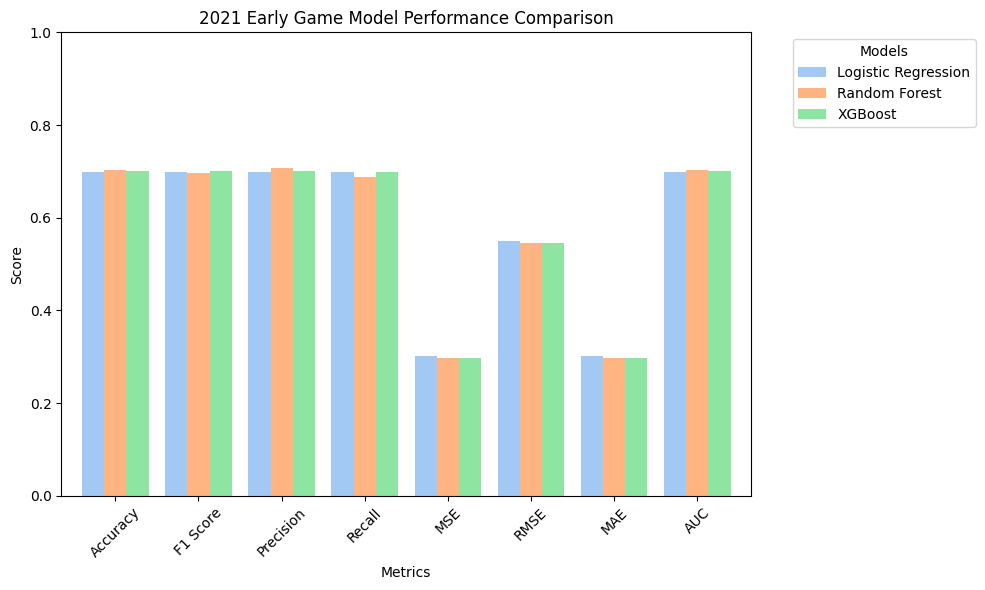

Best model for F1 Score is XGBoost: 0.70
Best model for Accuracy is Random Forest: 0.70
Best model for Precision is Random Forest: 0.71
Best model for Recall for is XGBoost: 0.70
Best model for MSE for is Random Forest: 0.30
Best model for MAE for is Random Forest: 0.30
Best model for RMSE for is Random Forest: 0.55
Best model for AUC for is Random Forest: 0.70
Overall best model: Logistic Regression



<Figure size 1400x800 with 0 Axes>

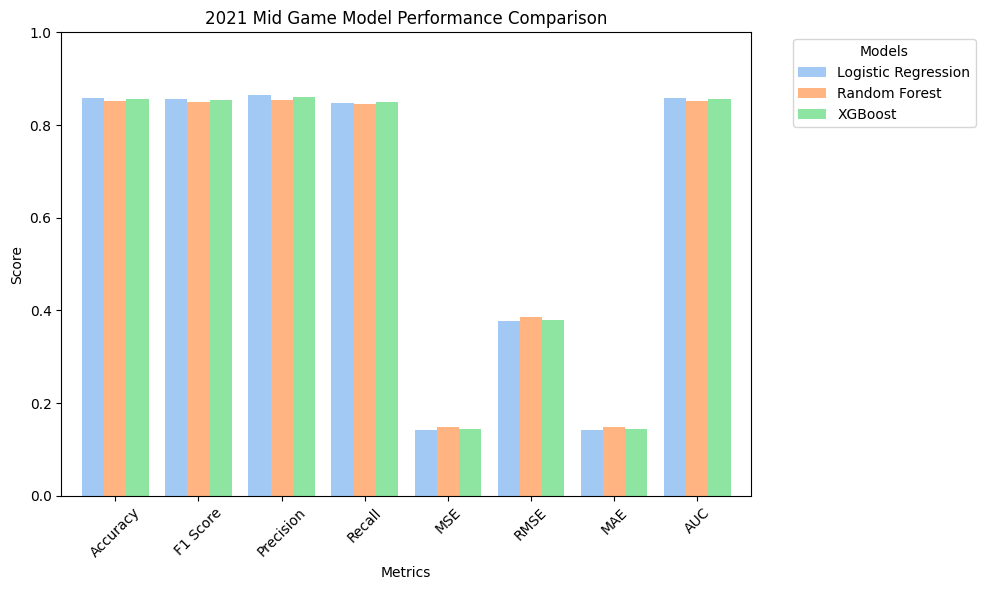

Best model for F1 Score is Logistic Regression: 0.86
Best model for Accuracy is Logistic Regression: 0.86
Best model for Precision is Logistic Regression: 0.87
Best model for Recall for is XGBoost: 0.85
Best model for MSE for is Logistic Regression: 0.14
Best model for MAE for is Logistic Regression: 0.14
Best model for RMSE for is Logistic Regression: 0.38
Best model for AUC for is Logistic Regression: 0.86
Overall best model: Logistic Regression



<Figure size 1400x800 with 0 Axes>

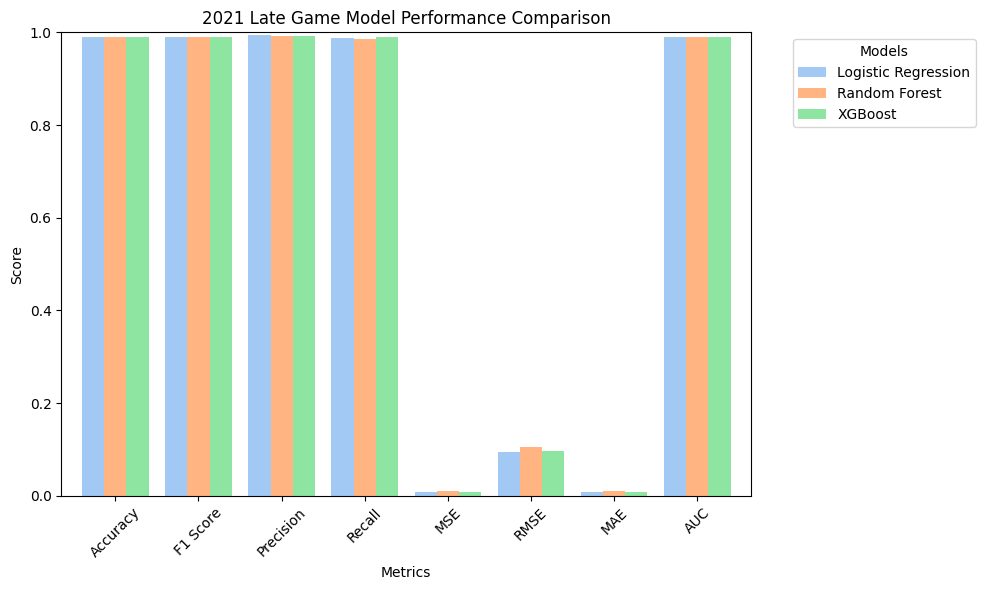

Best model for F1 Score is Logistic Regression: 0.99
Best model for Accuracy is Logistic Regression: 0.99
Best model for Precision is Logistic Regression: 0.99
Best model for Recall for is XGBoost: 0.99
Best model for MSE for is Logistic Regression: 0.01
Best model for MAE for is Logistic Regression: 0.01
Best model for RMSE for is Logistic Regression: 0.10
Best model for AUC for is Logistic Regression: 0.99
Overall best model: Logistic Regression



<Figure size 1400x800 with 0 Axes>

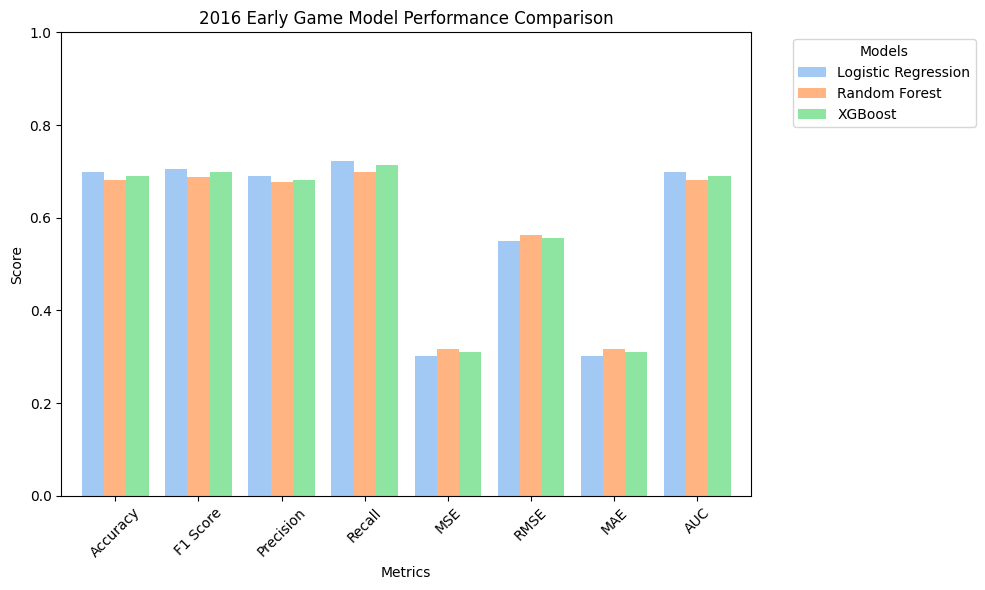

Best model for F1 Score is Logistic Regression: 0.71
Best model for Accuracy is Logistic Regression: 0.70
Best model for Precision is Logistic Regression: 0.69
Best model for Recall for is Logistic Regression: 0.72
Best model for MSE for is Logistic Regression: 0.30
Best model for MAE for is Logistic Regression: 0.30
Best model for RMSE for is Logistic Regression: 0.55
Best model for AUC for is Logistic Regression: 0.70
Overall best model: Logistic Regression



<Figure size 1400x800 with 0 Axes>

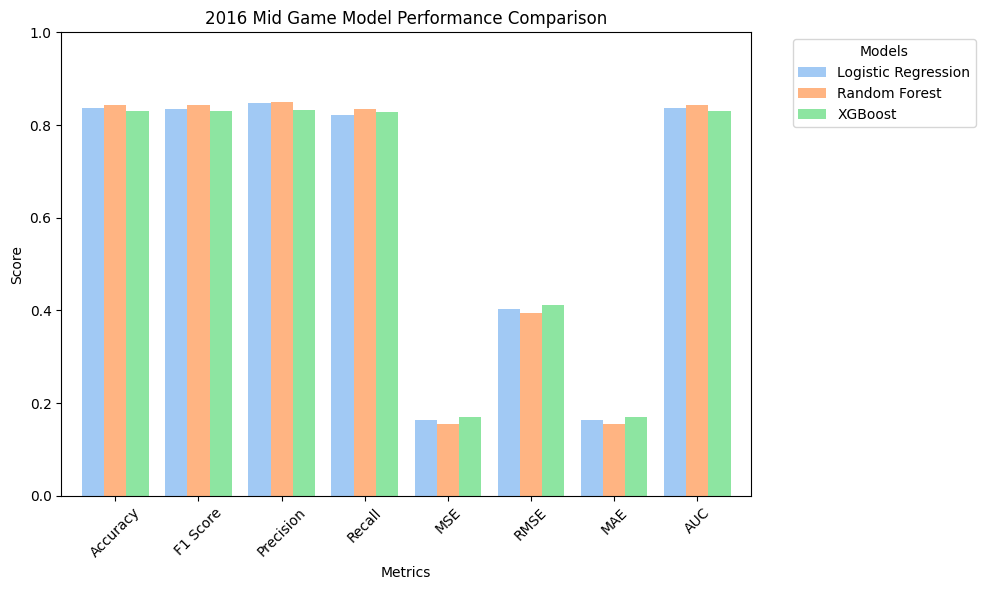

Best model for F1 Score is Random Forest: 0.84
Best model for Accuracy is Random Forest: 0.84
Best model for Precision is Random Forest: 0.85
Best model for Recall for is Random Forest: 0.83
Best model for MSE for is Random Forest: 0.16
Best model for MAE for is Random Forest: 0.16
Best model for RMSE for is Random Forest: 0.39
Best model for AUC for is Random Forest: 0.84
Overall best model: Random Forest



<Figure size 1400x800 with 0 Axes>

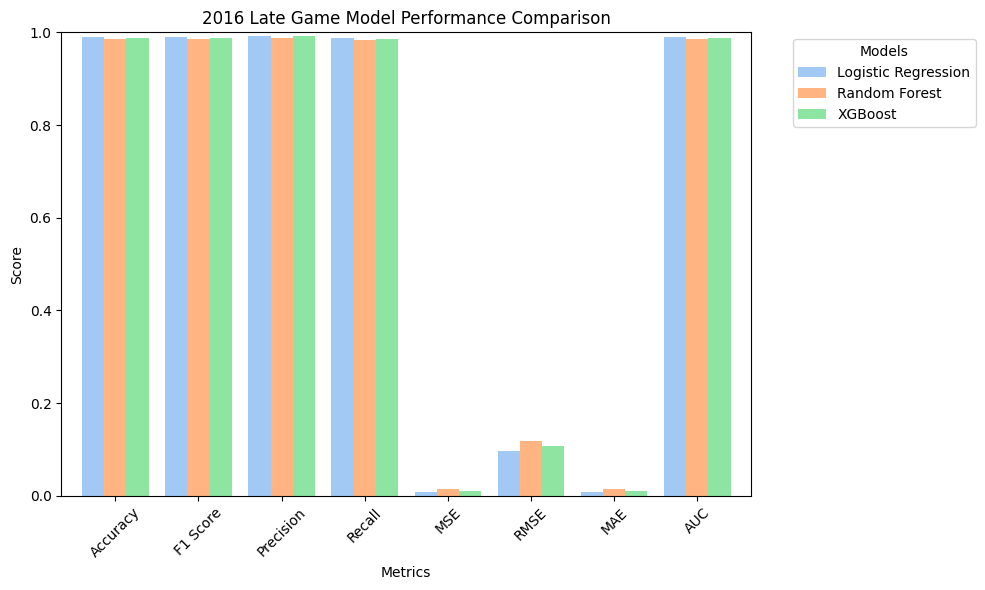

Best model for F1 Score is Logistic Regression: 0.99
Best model for Accuracy is Logistic Regression: 0.99
Best model for Precision is Logistic Regression: 0.99
Best model for Recall for is Logistic Regression: 0.99
Best model for MSE for is Logistic Regression: 0.01
Best model for MAE for is Logistic Regression: 0.01
Best model for RMSE for is Logistic Regression: 0.10
Best model for AUC for is Logistic Regression: 0.99
Overall best model: Logistic Regression



In [22]:
for year, states in models.items():
  for state, models_dict in states.items():
    df = dict_to_df(models_dict)
    plot_comparisons(df, year, state)

    best_model_f1 = df['F1 Score'].idxmax()
    best_f1_score = df['F1 Score'].max()

    best_model_accuracy = df['Accuracy'].idxmax()
    best_accuracy_score = df['Accuracy'].max()

    best_model_precision = df['Precision'].idxmax()
    best_precision_score = df['Precision'].max()

    best_model_recall = df['Recall'].idxmax()
    best_recall_score = df['Recall'].max()

    best_model_mse = df['MSE'].idxmin()
    best_mse_score = df['MSE'].min()

    best_model_mae = df['MAE'].idxmin()
    best_mae_score = df['MAE'].min()

    best_model_rmse = df['RMSE'].idxmin()
    best_rmse_score = df['RMSE'].min()

    best_model_auc = df['AUC'].idxmax()
    best_auc_score = df['AUC'].max()

    models = ['Logistic Regression', 'Random Forest', 'XGBoost'] # removed 'Optimized XGBoost' because it takes too long to train
    wins = {model: 0 for model in models}
    for metric in df.columns:
      best_model_for_metric = df[metric].idxmax()
      wins[best_model_for_metric] += 1

    best_model = max(wins, key=wins.get)

    print(f'Best model for F1 Score is {best_model_f1}: {best_f1_score:.2f}')
    print(f'Best model for Accuracy is {best_model_accuracy}: {best_accuracy_score:.2f}')
    print(f'Best model for Precision is {best_model_precision}: {best_precision_score:.2f}')
    print(f'Best model for Recall for is {best_model_recall}: {best_recall_score:.2f}')
    print(f'Best model for MSE for is {best_model_mse}: {best_mse_score:.2f}')
    print(f'Best model for MAE for is {best_model_mae}: {best_mae_score:.2f}')
    print(f'Best model for RMSE for is {best_model_rmse}: {best_rmse_score:.2f}')
    print(f'Best model for AUC for is {best_model_auc}: {best_auc_score:.2f}')
    print(f'Overall best model: {best_model}')
    print()

Logistic Regression seems to be the winner

# What if we remove some variables

Testing feature variables:

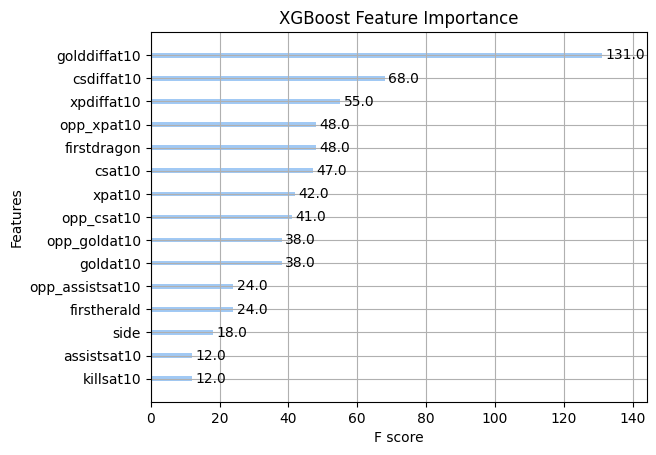

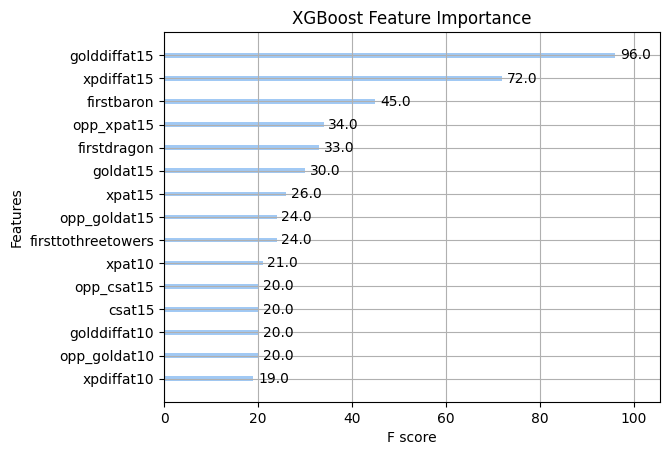

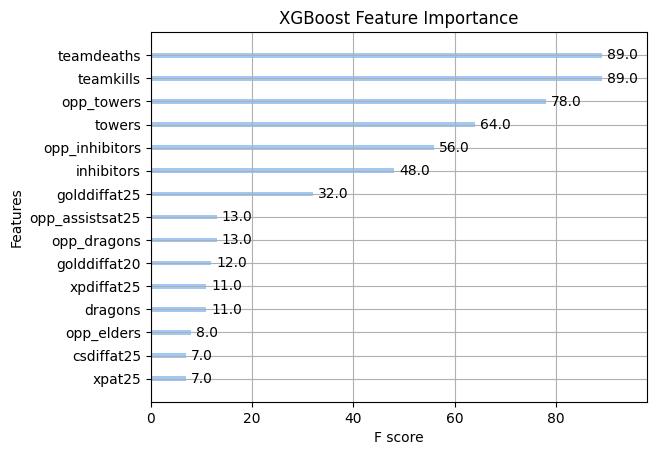

In [23]:
feature_importance = {
        'Early Game': {
            'Logistic Regression': logistic_regression(log_early_2021, 1000, 1, 'l2'),
            'Random Forest': random_forest(xgb_early_2021, 100, 10),
            'XGBoost': xgboost(xgb_early_2021, 100, 3, 0.1)
        },
        'Mid Game': {
            'Logistic Regression': logistic_regression(log_mid_2021, 1000, 1, 'l2'),
            'Random Forest': random_forest(xgb_mid_2021, 100, 10),
            'XGBoost': xgboost(xgb_mid_2021, 100, 3, 0.1)
        },
        'Late Game': {
            'Logistic Regression': logistic_regression(log_end_2021, 1000, 1, 'l2'),
            'Random Forest': random_forest(xgb_end_2021, 100, 10),
            'XGBoost': xgboost(xgb_end_2021, 100, 3, 0.1)
        }

}


In early game (10 minutes), gold diff between the teams are most important for predicting games. Then csdiff and then xpdiff. Gold diff is almost 2x more important than cd diff.

In mid game, cd diff then xp diff then whether the team was able to get the first baron.

In late game, team deaths, team kills, then opponent towers are important.

I want to see if I take away these features, will prediction go down

In [24]:
'''
Create new df to match the old ones without these features
'''

# Removing gold diff, cs diff, xp diff
early_feature_import = [
    'side', 'result', 'firstblood', 'firstdragon', 'firstherald',
    'goldat10', 'xpat10', 'csat10', 'opp_goldat10', 'opp_xpat10', 'opp_csat10',
    'killsat10', 'assistsat10', 'deathsat10', 'opp_killsat10', 'opp_assistsat10',
    'opp_deathsat10'
]

# Removing gold diff, xp diff, baron
mid_feature_import = [
    'side', 'result', 'firstblood', 'firstdragon', 'firstherald', 'firsttower', 'firstmidtower', 'firsttothreetowers',
    'goldat10', 'xpat10', 'csat10', 'opp_goldat10', 'opp_xpat10', 'opp_csat10', 'golddiffat10', 'xpdiffat10',
    'csdiffat10', 'killsat10', 'assistsat10', 'deathsat10', 'opp_killsat10', 'opp_assistsat10', 'opp_deathsat10',
    'goldat15', 'xpat15', 'csat15', 'opp_goldat15', 'opp_xpat15', 'opp_csat15',
    'csdiffat15', 'killsat15', 'assistsat15', 'deathsat15', 'opp_killsat15', 'opp_assistsat15', 'opp_deathsat15']


# Removing team kills, team deaths, opp tower
end_feature_import = [
    'side', 'result', 'dragons', 'opp_dragons', 'infernals', 'mountains', 'clouds', 'oceans', 'elders',
    'opp_elders', 'heralds', 'opp_heralds', 'barons', 'opp_barons', 'towers', 'inhibitors', 'opp_inhibitors', 'gamelength',
    'goldat20', 'xpat20', 'csat20', 'opp_goldat20', 'opp_xpat20', 'opp_csat20', 'golddiffat20', 'xpdiffat20',
    'csdiffat20', 'killsat20', 'assistsat20', 'deathsat20', 'opp_killsat20', 'opp_assistsat20', 'opp_deathsat20',
    'goldat25', 'xpat25', 'csat25', 'opp_goldat25', 'opp_xpat25', 'opp_csat25', 'golddiffat25',  'xpdiffat25',
    'csdiffat25', 'killsat25', 'assistsat25', 'deathsat25', 'opp_killsat25', 'opp_assistsat25', 'opp_deathsat25'
]


In [25]:
'''
Preprocessing the dataframes with the new features
'''
log_early_2016_feature = logistic_preprocess_df(df_2016, early_feature_import, map_team)
log_mid_2016_feature = logistic_preprocess_df(df_2016, mid_feature_import, map_team)
log_end_2016_feature = logistic_preprocess_df(df_2016, end_feature_import, map_team)

xgb_early_2016_feature = xgb_preprocess_df(df_2016, early_feature_import, map_team)
xgb_mid_2016_feature = xgb_preprocess_df(df_2016, mid_feature_import, map_team)
xgb_end_2016_feature = xgb_preprocess_df(df_2016, end_feature_import, map_team)

log_early_2021_feature = logistic_preprocess_df(df_2021, early_feature_import, map_team)
log_mid_2021_feature = logistic_preprocess_df(df_2021, mid_feature_import, map_team)
log_end_2021_feature = logistic_preprocess_df(df_2021, end_feature_import, map_team)

xgb_early_2021_feature = xgb_preprocess_df(df_2021, early_feature_import, map_team)
xgb_mid_2021_feature = xgb_preprocess_df(df_2021, mid_feature_import, map_team)
xgb_end_2021_feature = xgb_preprocess_df(df_2021, end_feature_import, map_team)

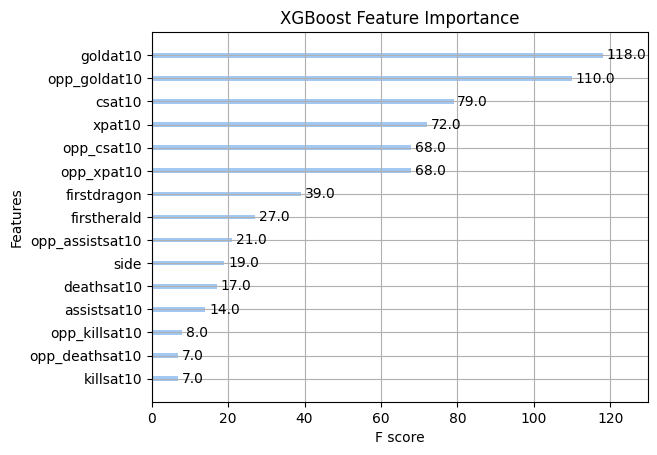

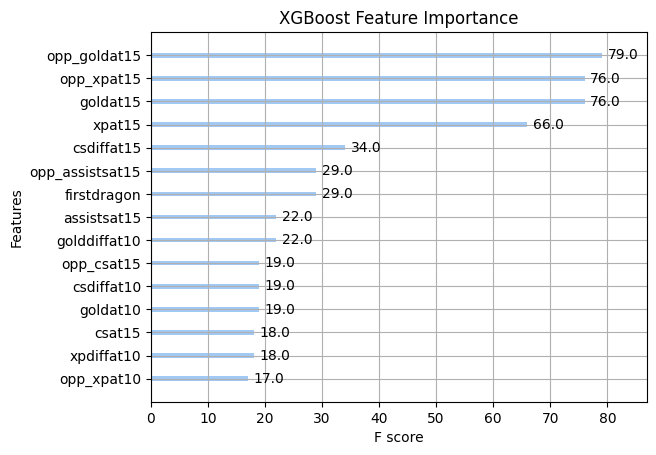

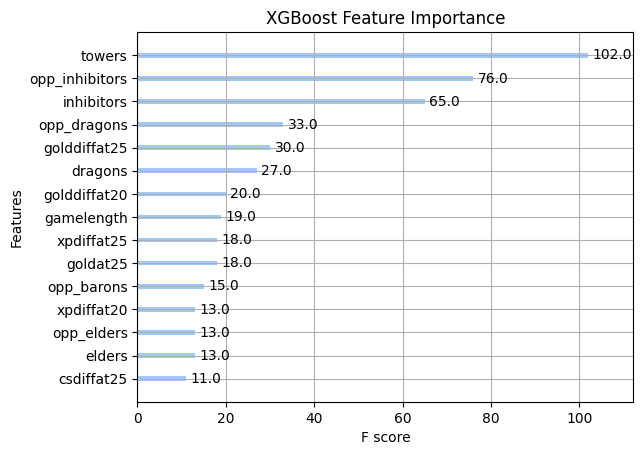

In [26]:
feature_importance_testing = {
        'Early Game': {
            'Logistic Regression': logistic_regression(log_early_2021_feature, 1000, 1, 'l2'),
            'Random Forest': random_forest(xgb_early_2021_feature, 100, 10),
            'XGBoost': xgboost(xgb_early_2021_feature, 100, 3, 0.1)
        },
        'Mid Game': {
            'Logistic Regression': logistic_regression(log_mid_2021_feature, 1000, 1, 'l2'),
            'Random Forest': random_forest(xgb_mid_2021_feature, 100, 10),
            'XGBoost': xgboost(xgb_mid_2021_feature, 100, 3, 0.1)
        },
        'Late Game': {
            'Logistic Regression': logistic_regression(log_end_2021_feature, 1000, 1, 'l2'),
            'Random Forest': random_forest(xgb_end_2021_feature, 100, 10),
            'XGBoost': xgboost(xgb_end_2021_feature, 100, 3, 0.1)
        }
}

In [27]:
print('2021')
print('Early Logistic Regression Accuracy')
print(f"After: {feature_importance_testing['Early Game']['Logistic Regression'][1]['Accuracy']} and before: {feature_importance['Early Game']['Logistic Regression'][1]['Accuracy']}")
print('Mid Logistic Regression')
print(f"After: {feature_importance_testing['Mid Game']['Logistic Regression'][1]['Accuracy']} and before: {feature_importance['Mid Game']['Logistic Regression'][1]['Accuracy']}")
print('Late Logistic Regression')
print(f"After: {feature_importance_testing['Late Game']['Logistic Regression'][1]['Accuracy']} and before: {feature_importance['Late Game']['Logistic Regression'][1]['Accuracy']}")
print('')
print('Early Random Forests Accuracy')
print(f"After: {feature_importance_testing['Early Game']['Random Forest'][1]['Accuracy']} and before: {feature_importance['Early Game']['Random Forest'][1]['Accuracy']}")
print('Mid Random Forests')
print(f"After: {feature_importance_testing['Mid Game']['Random Forest'][1]['Accuracy']} and before: {feature_importance['Mid Game']['Random Forest'][1]['Accuracy']}")
print('Late Random Forests')
print(f"After: {feature_importance_testing['Late Game']['Random Forest'][1]['Accuracy']} and before: {feature_importance['Late Game']['Random Forest'][1]['Accuracy']}")
print('')
print('Early XGBoost Accuracy')
print(f"After: {feature_importance_testing['Early Game']['XGBoost'][1]['Accuracy']} and before: {feature_importance['Early Game']['XGBoost'][1]['Accuracy']}")
print('Mid XGBoost Accuracy')
print(f"After: {feature_importance_testing['Mid Game']['XGBoost'][1]['Accuracy']} and before: {feature_importance['Mid Game']['XGBoost'][1]['Accuracy']}")
print('Late XGBoost Accuracy')
print(f"After: {feature_importance_testing['Late Game']['XGBoost'][1]['Accuracy']} and before: {feature_importance['Late Game']['XGBoost'][1]['Accuracy']}")


2021
Early Logistic Regression Accuracy
After: 0.6985507246376812 and before: 0.6985507246376812
Mid Logistic Regression
After: 0.7892976588628763 and before: 0.8581939799331104
Late Logistic Regression
After: 0.9785953177257525 and before: 0.9908584169453735

Early Random Forests Accuracy
After: 0.6967670011148273 and before: 0.7021181716833891
Mid Random Forests
After: 0.7832775919732441 and before: 0.8510590858416945
Late Random Forests
After: 0.9832775919732442 and before: 0.9890746934225195

Early XGBoost Accuracy
After: 0.6998885172798216 and before: 0.7018952062430324
Mid XGBoost Accuracy
After: 0.7890746934225195 and before: 0.8561872909698997
Late XGBoost Accuracy
After: 0.9841694537346711 and before: 0.9906354515050168


Those features increase accuracy most in the mid game. In the early game, all the features go up

# Cross validation

In [28]:
def logistic_regression_cv(C=1.0, max_iter=1000, penalty='l2'):
    model = LogisticRegression(C=C, max_iter=max_iter, penalty=penalty, solver='liblinear')
    return model

def xgboost_cv(n_estimators=100, max_depth=3, learning_rate=0.1):
    model = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, eval_metric='logloss', random_state=42)
    return model

def random_forest_cv(n_estimators=100, max_depth=None):
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    return model
dataset_map = {
    'Early Game': log_early_2021,
    'Mid Game': log_mid_2021,
    'Late Game': log_end_2021
}

In [29]:
model_cv = {
    '2021': {
        'Early Game': {
            'Logistic Regression': logistic_regression_cv(1000, 100, 'l2'),
            'Random Forest': random_forest_cv(100, 10),
            'XGBoost': xgboost_cv(100, 3, 0.1)
        },
        'Mid Game': {
            'Logistic Regression': logistic_regression_cv(1000, 100, 'l2'),
            'Random Forest': random_forest_cv(100, 10),
            'XGBoost': xgboost_cv(100, 3, 0.1)
        },
        'Late Game': {
            'Logistic Regression': logistic_regression_cv(1000, 100, 'l2'),
            'Random Forest': random_forest_cv(100, 10),
            'XGBoost': xgboost_cv(100, 3, 0.1)
        }
    },
    '2016': {
        'Early Game': {
            'Logistic Regression': logistic_regression_cv(1000, 100, 'l2'),
            'Random Forest': random_forest_cv(100, 10),
            'XGBoost': xgboost_cv(100, 3, 0.1)
        },
        'Mid Game': {
            'Logistic Regression': logistic_regression_cv(1000, 100, 'l2'),
            'Random Forest': random_forest_cv(100, 10),
            'XGBoost': xgboost_cv(100, 3, 0.1)
        },
        'Late Game': {
            'Logistic Regression': logistic_regression_cv(1000, 100, 'l2'),
            'Random Forest': random_forest_cv(100, 10),
            'XGBoost': xgboost_cv(100, 3, 0.1)
        }
    }
}

In [30]:
for year, state_dict in model_cv.items():
    if year == '2021':
        for state_name, model_dict in state_dict.items():
            df = dataset_map[state_name]
            X = df.drop('result', axis=1)
            y = df['result']

            for model_name, model in model_dict.items():
                scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
                print(f"{year} - {state_name} - {model_name} | Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")

    elif year == '2016':
        for state_name, model_dict in state_dict.items():
              df = dataset_map[state_name]
              X = df.drop('result', axis=1)
              y = df['result']

              for model_name, model in model_dict.items():
                  scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
                  print(f"{year} - {state_name} - {model_name} | Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")

2021 - Early Game - Logistic Regression | Accuracy: 0.7100 (+/- 0.0120)
2021 - Early Game - Random Forest | Accuracy: 0.7082 (+/- 0.0116)
2021 - Early Game - XGBoost | Accuracy: 0.7090 (+/- 0.0103)
2021 - Mid Game - Logistic Regression | Accuracy: 0.8590 (+/- 0.0074)
2021 - Mid Game - Random Forest | Accuracy: 0.8560 (+/- 0.0054)
2021 - Mid Game - XGBoost | Accuracy: 0.8581 (+/- 0.0057)
2021 - Late Game - Logistic Regression | Accuracy: 0.9915 (+/- 0.0021)
2021 - Late Game - Random Forest | Accuracy: 0.9897 (+/- 0.0011)
2021 - Late Game - XGBoost | Accuracy: 0.9929 (+/- 0.0009)
2016 - Early Game - Logistic Regression | Accuracy: 0.7100 (+/- 0.0120)
2016 - Early Game - Random Forest | Accuracy: 0.7082 (+/- 0.0116)
2016 - Early Game - XGBoost | Accuracy: 0.7090 (+/- 0.0103)
2016 - Mid Game - Logistic Regression | Accuracy: 0.8590 (+/- 0.0074)
2016 - Mid Game - Random Forest | Accuracy: 0.8560 (+/- 0.0054)
2016 - Mid Game - XGBoost | Accuracy: 0.8581 (+/- 0.0057)
2016 - Late Game - Logist